In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from neupy import algorithms, layers, utils

In [2]:
def load_data():
    X, _ = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
    X = (X / 255.).astype(np.float32)

    np.random.shuffle(X)
    x_train, x_test = X[:60000], X[60000:]

    return x_train, x_test

In [3]:
def visualize_reconstructions(autoencoder, x_test):
    n_samples = 4
    image_vectors = x_test[:n_samples, :]
    images = image_vectors * 255.
    predicted_images = autoencoder.predict(image_vectors)
    predicted_images = predicted_images * 255.

    # Compare real and reconstructed images
    fig, axes = plt.subplots(4, 2, figsize=(12, 8))
    iterator = zip(axes, images, predicted_images)

    for (left_ax, right_ax), real_image, predicted_image in iterator:
        real_image = real_image.reshape((28, 28))
        predicted_image = predicted_image.reshape((28, 28))

        left_ax.imshow(real_image, cmap=plt.cm.binary)
        right_ax.imshow(predicted_image, cmap=plt.cm.binary)
    plt.plot()
    plt.show()

In [4]:
autoencoder = algorithms.Momentum(
    [
        layers.Input(784),
        layers.GaussianNoise(mean=0.5, std=0.1),
        layers.Sigmoid(100),
        layers.Sigmoid(784),
    ],
    step=0.1,
    verbose=True,
    momentum=0.9,
    nesterov=True,
    loss='rmse',
)


Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 128
[OPTION] loss = rmse
[OPTION] momentum = 0.9
[OPTION] nesterov = True
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/sigmoid-2:0", shape=(?, 784), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
Instructions for updating:
Colocations handled automatically by placer.
[TENSORFLOW] Initialization finished successfully. It took 0.32 seconds


In [5]:
print("Preparing data...")
x_train, x_test = load_data()

print("Training autoencoder...")
autoencoder.train(x_train, x_train, x_test, x_test, epochs=40)

Preparing data...


Time: 0:00:00 |  6%|#                            | ETA:  0:00:02 | loss:   0.47

Training autoencoder...


#1 : [1 sec] train: 0.257866, valid: 0.261907


Time: 0:00:00 | 14%|####                         | ETA:  0:00:01 | loss:  0.258

#2 : [1 sec] train: 0.253546, valid: 0.260088


Time: 0:00:00 | 10%|##                           | ETA:  0:00:01 | loss:  0.252

#3 : [1 sec] train: 0.250902, valid: 0.258500


Time: 0:00:00 | 12%|###                          | ETA:  0:00:01 | loss:  0.248

#4 : [1 sec] train: 0.247278, valid: 0.255581


Time: 0:00:00 | 11%|###                          | ETA:  0:00:01 | loss:  0.251

#5 : [1 sec] train: 0.242477, valid: 0.252010


Time: 0:00:00 | 11%|###                          | ETA:  0:00:01 | loss:  0.246

#6 : [1 sec] train: 0.237043, valid: 0.248788


Time: 0:00:00 | 11%|###                          | ETA:  0:00:01 | loss:  0.241

#7 : [1 sec] train: 0.231594, valid: 0.245841


Time: 0:00:00 | 12%|###                          | ETA:  0:00:01 | loss:  0.229

#8 : [1 sec] train: 0.226501, valid: 0.243224


Time: 0:00:00 | 14%|####                         | ETA:  0:00:01 | loss:  0.227

#9 : [1 sec] train: 0.221855, valid: 0.240732


Time: 0:00:00 | 14%|####                         | ETA:  0:00:01 | loss:  0.224

#10 : [1 sec] train: 0.217630, valid: 0.238363


#11 : [1 sec] train: 0.213769, valid: 0.236065


Time: 0:00:00 | 14%|####                         | ETA:  0:00:01 | loss:  0.217

#12 : [1 sec] train: 0.210211, valid: 0.233932


Time: 0:00:00 | 14%|####                         | ETA:  0:00:01 | loss:  0.214

#13 : [1 sec] train: 0.206898, valid: 0.231884


Time: 0:00:00 | 12%|###                          | ETA:  0:00:01 | loss:  0.209

#14 : [1 sec] train: 0.203800, valid: 0.229953


#15 : [1 sec] train: 0.200908, valid: 0.228219


Time: 0:00:00 | 10%|##                           | ETA:  0:00:01 | loss:  0.203

#16 : [1 sec] train: 0.198197, valid: 0.226666


Time: 0:00:00 | 10%|##                           | ETA:  0:00:01 | loss:    0.2

#17 : [1 sec] train: 0.195639, valid: 0.225312


Time: 0:00:00 | 14%|####                         | ETA:  0:00:01 | loss:  0.201

#18 : [1 sec] train: 0.193216, valid: 0.224084


Time: 0:00:00 | 10%|##                           | ETA:  0:00:01 | loss:  0.196

#19 : [1 sec] train: 0.190912, valid: 0.222984


Time: 0:00:00 |  8%|##                           | ETA:  0:00:01 | loss:  0.196

#20 : [1 sec] train: 0.188714, valid: 0.222014


Time: 0:00:00 | 14%|####                         | ETA:  0:00:01 | loss:  0.194

#21 : [1 sec] train: 0.186610, valid: 0.221155


#22 : [1 sec] train: 0.184591, valid: 0.220411


Time: 0:00:00 | 12%|###                          | ETA:  0:00:01 | loss:   0.19

#23 : [1 sec] train: 0.182650, valid: 0.219676


Time: 0:00:00 | 11%|###                          | ETA:  0:00:01 | loss:  0.194

#24 : [1 sec] train: 0.180784, valid: 0.219140


Time: 0:00:00 | 14%|####                         | ETA:  0:00:01 | loss:  0.187

#25 : [1 sec] train: 0.178991, valid: 0.218580


#26 : [1 sec] train: 0.177267, valid: 0.218046


Time: 0:00:00 | 11%|###                          | ETA:  0:00:01 | loss:  0.189

#27 : [1 sec] train: 0.175607, valid: 0.217510


#28 : [1 sec] train: 0.174006, valid: 0.217040


Time: 0:00:00 |  8%|##                           | ETA:  0:00:01 | loss:   0.18

#29 : [1 sec] train: 0.172456, valid: 0.216520


Time: 0:00:00 | 10%|##                           | ETA:  0:00:01 | loss:  0.176

#30 : [1 sec] train: 0.170956, valid: 0.216144


Time: 0:00:00 | 12%|###                          | ETA:  0:00:01 | loss:  0.177

#31 : [1 sec] train: 0.169500, valid: 0.215755


Time: 0:00:00 | 11%|###                          | ETA:  0:00:01 | loss:  0.181

#32 : [1 sec] train: 0.168086, valid: 0.215382


Time: 0:00:00 | 11%|###                          | ETA:  0:00:01 | loss:   0.18

#33 : [1 sec] train: 0.166712, valid: 0.215048


Time: 0:00:00 | 11%|###                          | ETA:  0:00:01 | loss:  0.178

#34 : [1 sec] train: 0.165375, valid: 0.214742


Time: 0:00:00 | 12%|###                          | ETA:  0:00:01 | loss:  0.172

#35 : [1 sec] train: 0.164073, valid: 0.214426


Time: 0:00:00 | 12%|###                          | ETA:  0:00:01 | loss:   0.17

#36 : [1 sec] train: 0.162804, valid: 0.214241


Time: 0:00:00 | 14%|####                         | ETA:  0:00:01 | loss:   0.17

#37 : [1 sec] train: 0.161567, valid: 0.214031


#38 : [1 sec] train: 0.160359, valid: 0.213825


Time: 0:00:00 |  8%|##                           | ETA:  0:00:01 | loss:  0.167

#39 : [1 sec] train: 0.159179, valid: 0.213646


#40 : [1 sec] train: 0.158026, valid: 0.213525


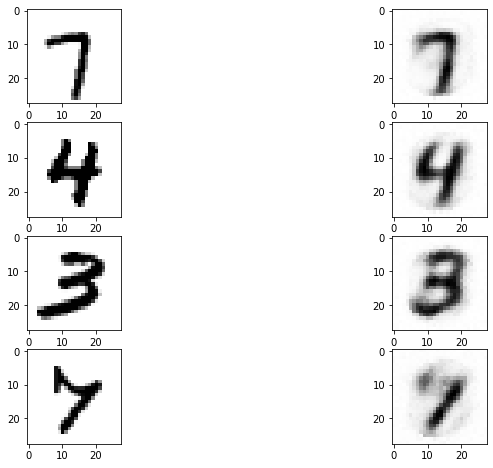

In [6]:
visualize_reconstructions(autoencoder, x_test)

https://github.com/itdxer/neupy/blob/master/examples/autoencoder/denoising_autoencoder.py